<h1> End-to-End Machine Learning Project </h1>

<h4> Following Chapter 2 from <i> Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow </i> by <i> Aurelien Geron </i> </h4>

<h2> Get the data </h2>

The dataset is the California Housing Prices dataset from the StatLib repository. The data was sourced from the 1990 California census. The goal of this machine learning project is to build a model that can accurately predict median house prices for certain districts within California using the data from the dataset

<h3> Download the data </h3>

To import the data, I first need to install some packages

In [1]:
import os
import tarfile
import urllib

I then need to define the URL of where the data can be downloaded from, then define where that data will be stored

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

The fetch_housing_data() function downloads the directory, and extracts a csv file containing the required data

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz= tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

To load the data into Python it is very useful to utilise a package called pandas

In [162]:
import pandas as pd

The load_housing_data() function reads the csv file containing the data and returns a pandas DataFrame object for use in Python

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

I can then call these functions before using the pandas DataFrame head() method to visualise the top 5 rows of data imported from the downloaded dataset

In [163]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


I can then use the DataFrame info() method to get a quick description about the data

In [164]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see that there are 20,640 instances in this dataset, each representing a particular district, with 10 attributes each. We can also see that there are 207 districts without the total_bedroom attributes, which will need to be fixed later. We can also see that all but the ocean_proximity attribute is a float64 datatype, which is important to consider as it affects how we manipulate the data

We can use the DataFrame value_counts() method to see a list of the unique values for an attribute in the dataset, in this case we can use it to better understand the ocean_proximity attribute

In [10]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

To better understand the numerical data in the DataFrame we can use the method describe() which will give us information such as minimum, maximum and mean values as well as standard deviation

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


We can also use the matplotlib library to plot histograms of our data, to give us a quick visual inspection of our data

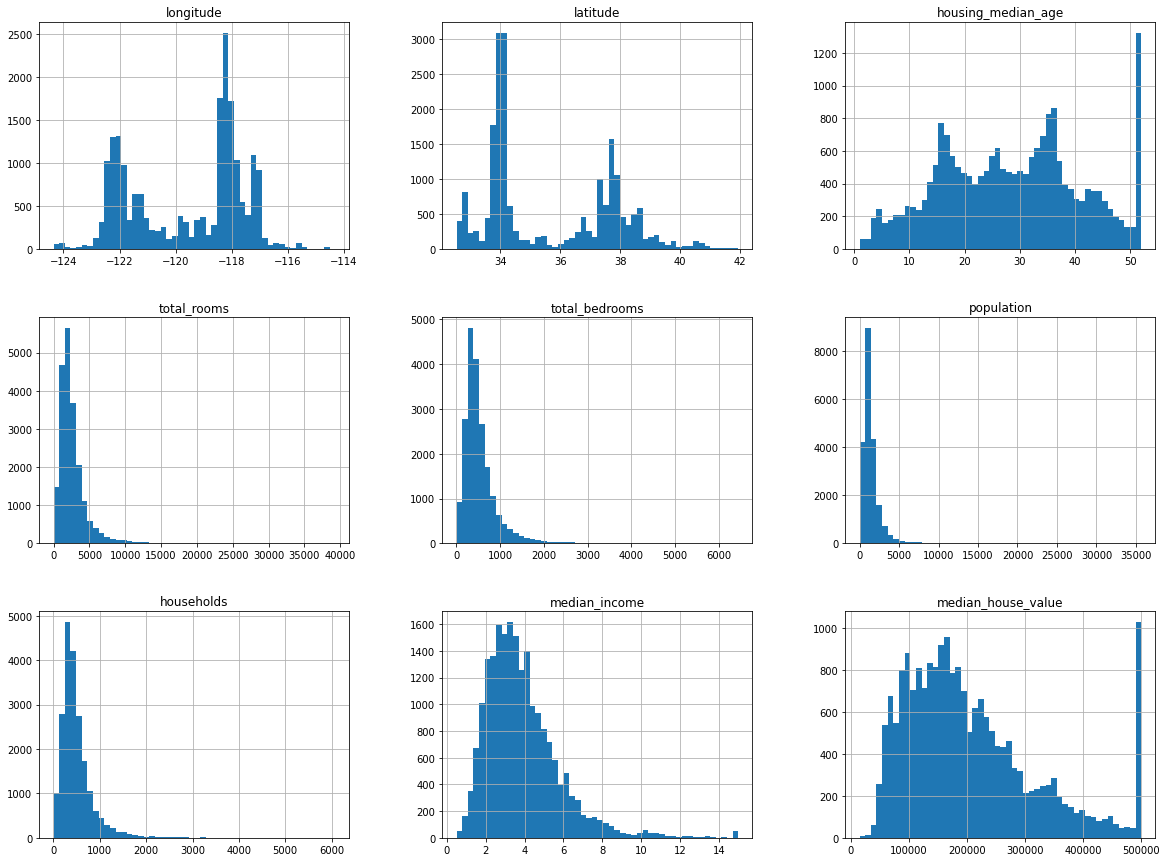

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

We can see some strange aspects of the data that should be considered. Firstly, the median_income attribute has been preprocessed, where the number represents 10,000 dollars, this is fine but important to recognise. We can also see that the housing_median_age and median_house_value attributes have been capped, which explains the unnatural looking spikes at the end of each graph. This can affect the machine learning algorithms if it is necessary to predict house values above this max-value ($500,000), and if this is required, this data should be rectified. Finally, we can see that many of the graphs are positively skewed (the median value is greater than the mean value), machine learning algorithms tend to work better on normally-distributed data

<h3> Create a Test Set </h3>

To prevent our model from overfitting or suffering from whats known as the <i> data snooping bias </i>, we need to section off a set of data that is used exclusively to test our potential models. This simulates the model being used on future data, to see how it performs on data it has not been trained on. Typically 20% of the data set is sectioned off into the test set

We can use numpy's random sub-package to help us randomly select which data we want to be in our test set, by creating the split_train_test() function and then calling it on our data set, this randomly splits the data into two DataFrames, one for the training data and one for the testing data

In [193]:
import numpy as np

In [194]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size]
    return data.iloc[train_indices], data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing, 0.2)

It is useful to create functions for each data processing step as it allows us to reuse the function on future data and is important for creating a data pipeline

A downside to this way of splitting the data is that because it's random, every time this function is used on the dataset, it splits the data differently. This means that if the function is used every time that new data is added to the dataset, the machine learning algorithm will eventually be able to train off the entire dataset defeating the purpose of the test set

Instead we can use a hashing function on each instance's identifier and split the data based on the value of that hash. This means that as long as the hash function stays the same, no instance can move from the test set to the train set and new data will continue to be split by the same ratio as the initial data

We can do this using the following implementation

In [16]:
from zlib import crc32

In [17]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

The test_set_check() function returns a hash of the identifier value using the crc32 sub-package of zlib 

In [18]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

The split_train_test_by_id() function uses the test_set_check() function to split the data into train and test sets based on the hash values of the data

We don't have any unique identifier for each district so we can use the row index, this may end up being an issue, however, if the order of the data is changed, or if instances are removed from the dataset

In [19]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

An alternative would be to combine the geographical location data of the data instances to create a unique identifier for each district, this identifier is thus independent of how the dataset is stored

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-learn has its own inbuilt test-split function called train_test_split(), which can also be used to split the dataset. It also has the inbuilt capability to split multiple datasets in the same places which can be useful if your labels are kept in a separate DataFrame.

In [21]:
from sklearn.model_selection import train_test_split

In [246]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

The previous examples have all been purely random sampling methods which works very well for large sets of data. Unfortunately, in many cases random sampling carriest the risk of sampling bias, where by chance the train and test datasets are not split evenly by certain parameters. To prevent this we can implement stratified sampling, where we make sure that the train and test sets are more representative of the overall data. For example, we can make sure that the datasets contain data with the same spread of median_incomes. We can do this by first creating median income brackets using the pandas cut() method

In [242]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])

In [243]:
housing["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

Which we can view using the numpy.array hist() method

<AxesSubplot:>

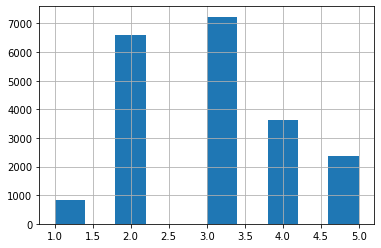

In [244]:
housing["income_cat"].hist()

Scikit-Learn has a class that allows us to apply statified sampling to a dataset to create a representative test set

By creating an instance of the StratifiedShuffleSplit() class and using its inbuilt split() method, we can split the dataset into train and test sets, whilst using stratified sampling to ensure that each set contains a representative amount of instances from each income bracket

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

In [26]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

We can then look at the percentage of districts in each median income bracket for the test set which has been split using stratified sampling

In [27]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

Comparing this to the percentage of districts in each median income bracket for the whole dataset, we can see that it very well represents the entire dataset

In [28]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

This is especially true if we compare it to test set split using randomly sampling 

In [247]:
test_set["income_cat"].value_counts() / len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

And now we can remove the median income brackets to get the dataset back to its original form

In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<h2> Discover and Visualize the Data to Gain Insights </h2>

When we look at and make insights on the data, it is important that we are only doing so on the train data. This is to make sure that we can compare our insights to new data when we test our model

We should also create a copy of the dataset so that any manipulations to the data we make, we can always undo it

In [32]:
housing = strat_train_set.copy()

<h3> Visualizing Geographical Data </h3>

The first visualization we can do is plot each data point by longitude and latitude to see a geographical representation of the districts in the dataset

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

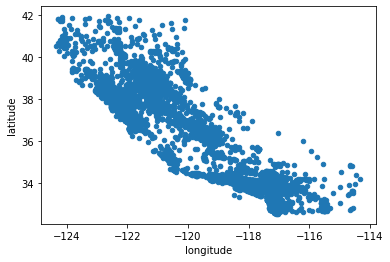

In [33]:
housing.plot(kind="scatter", x="longitude", y="latitude")

We can make this plot easier to see by adding some transparency to the points

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

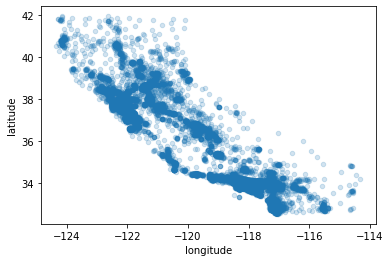

In [261]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

We can also represent more data in this graph. For example the radius of each circle can be made to represent the population of each district and the color can represent the median house value in each district

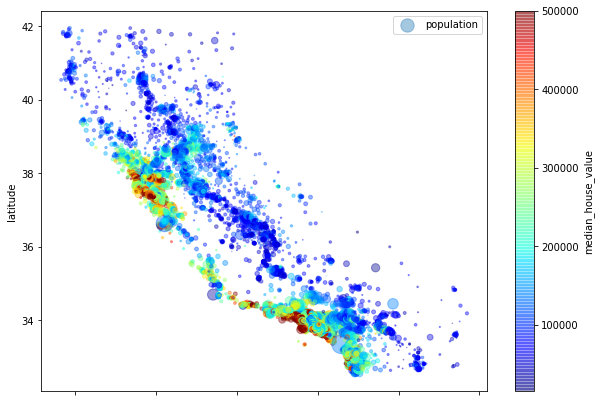

In [259]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

<h3> Looking for Correlations <h3>

We can look for correlations by calculating the <i>standard correlation coefficient</i> of each pair of dataset

In [36]:
corr_matrix = housing.corr()

And look specifically at the correlation between each attribute and the median house value

In [37]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

For a more in depth look at the correlation between each attribute we can use the pandas scatter_matrix() function to see a scatter plot of each pair of variables

In [38]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

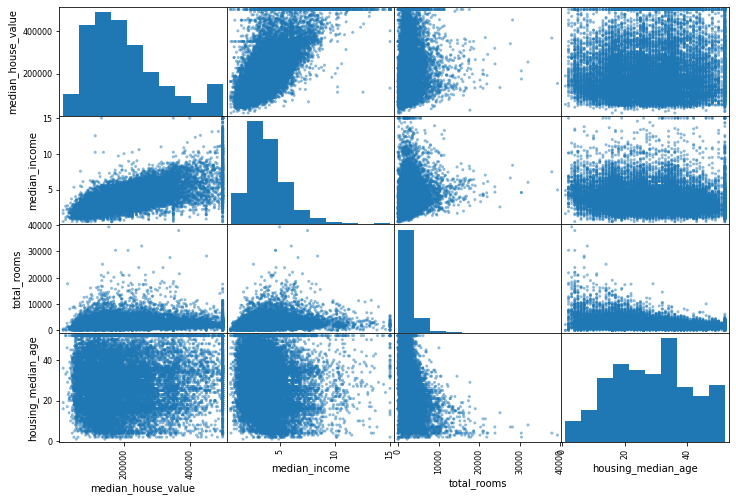

In [39]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

Instead of plotting an attribute against itself, the scatter matrix plots a histogram of the attribute, hence the diagonal being all histograms

As we can see that median income is the attribute that correlates the most with median house value, we can more closely look at this particular plot

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

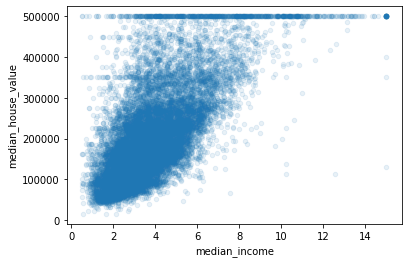

In [40]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
            alpha=0.1)

In this plot you can easily see both the positive correlation and the price cap at 500000 being represented in the graph

<h3> Experimenting with Attribute Combinations </h3>

As we can see that many of the district attributes have only a small correlation with the median house price, it may make more sence to combine some of these attributes into a new attribute. For example we can divide the total number of rooms by the total number of households in the district to get the average number of rooms per household. This will probably be a much better indicator of median house value than either of the component attributes. We can make similar calculations to find the fraction of total rooms in the district that are bedrooms and the average number of occupents per household

In [41]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

After creating these new combination attributes we can calculate a new correlation matrix

In [42]:
corr_matrix = housing.corr()

In [43]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

As you can see, the new rooms per household attribute has a fairly good correlation with median house value

<h2> Prepare the Data for Machine Learning Algorithms </h2>

When preparing the data for the machine learning algorithms, it is important to define each preparation step as a function so that the steps can be reproduced on new data, can be repurposed in future data projects and so that they can be implemented into a data pipeline that allows experimentation with which preparation steps are used

In order to start the data preparation steps we need to first create a clean training set, so that we aren't irreversibly changing the data. We also need to separate the predictors and the labels. The predictors are simply all the dataset attribute excluding the attribute we want to be able to predict and the label is the attribute we want to predict, which in our case, is the median house value

In [44]:
housing = strat_train_set.drop("median_house_value", axis=1)

In [45]:
housing_labels = strat_train_set["median_house_value"].copy()

<h3> Data Cleaning </h3>

One of the first things we need to do to the data is to fix the missing data in the total_bedrooms attribute. We can either get rid of the districts missing the data, get rid of the total_bedrooms attribute, or create values for the missing data (this could be zeros, the mean value etc.). These three options can be accomplished easily with DataFrame's inbuilt methods dropna(), drop() and fillna() respectively

In [46]:
# remove districts:  housing.dropna(subset)=["total_bedrooms"])
# remove attribute:  housing.drop("total_bedrooms", axis=1)
# create data:  median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

With option three, it is important to save that calculated median value as we will need it for missing data in the test set or any new data trained on later

Scikit-Learn also has its own inbuilt class for dealing with missing data called SimpleImputer. We can instruct it to fill in missing data with median values

In [47]:
from sklearn.impute import SimpleImputer

In [48]:
imputer = SimpleImputer(strategy="median")

Before we apply the imputer to the data, we need to remove the non-numerical data from our dataframe, this can be added back once the missing values have been corrected

In [49]:
housing_num = housing.drop("ocean_proximity", axis=1)

And we can now fit the imputer to the dataset

In [50]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer function is very useful because we can apply it to all future data added to the dataset and it will fix any missing data for any numerical attribute

We can see the median values for each attribute by viewing the imputer.statistics_ attribute

In [51]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [52]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

We can now transform the dataset to include the fixed attributes

In [53]:
X = imputer.transform(housing_num)

The transform function returned a NumPy array, which can be reconverted into a Pandas DataFrame easily

In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

<h3> Handling Text and Categorical Attributes </h3>

We need to apply separate data cleaning methods to text attributes such as our ocean_proximity attribute. To really see what kind of data is kept in this attribute we can call the head() method on the ocean_proximity column of our data

In [55]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


We can see that the text in this attribute represents certain categories. For categorical data, it works much better if we convert the categories into integer values. To do this we can use Scikit-Learn's inbuilt class, OrdinalEncoder

In [56]:
from sklearn.preprocessing import OrdinalEncoder

In [57]:
ordinal_encoder = OrdinalEncoder()

In [58]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [59]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

The OrdinalEncoder method converts each category into an integer, we can see each of the categories by looking at the categories_ attribute

In [262]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

This method has some drawbacks however, such as the fact that categories that are similar have no guarantee of having similar integer values associated with them

An alternative method is to use a separate attributes for each category. This means that each district has a attribute for "<1H OCEAN" which is either 1 for districts that have this value as their ocean_proximity attribute, and 0 for the rest. The same is true for each ocean_proximity category. This method is known as <i> one-hot encoding </i>

Thankfully, Scikit-Learn has a class that we can use to give our text attribute one-hot encoding, called OneHotEncoder

In [60]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
cat_encoder = OneHotEncoder()

In [62]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [63]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

We can see that the fit_transform() method of the OneHotEncoder class returns a sparse matrix. This is to conserve data, as it only stores the non-zero values

It is very easy, however, to convert this sparse matrix into a numpy array by calling the toarray() method

In [64]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Again, we can have a look at the categories by calling the categories_ variable

In [65]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

<h3> Custom Transformers </h3>

Although Scikit-Learn contains many useful transformers, it's very important to be able to create your own, specific to the task and data you are applying it to. For this transformer to work seamlessly with Scikit-Learn it needs to contain three methods, fit(), transform() and fit_transform. Luckily Scikit-Learn has a base class that will provide a fit_transform() method for you, all you need to do is adding TransformerMixin as a base class. You can also add Scitkit-Learn's BaseEstimator as a base class to give you the get_params() and set_params() methods

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

In [67]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [68]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, bedrooms_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]        

In [69]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

This is a way of defining a transformer that can create the rooms_per_household, population_per_household and bedrooms_per_room attributes and add them to the dataset. You can also see that this transformer has one hyperparameter, add_bedrooms_per_room. This is a boolean that defines whether or not the transformer should add the bedrooms_per_room attibute or not. It is very useful to create such hyperparameters as it saves a lot of time tweaking the models down the line if you just have to change the hyperparameters

<h3> Feature Scaling </h3>

A very important transformation to make to the data is <i>feature scaling</i>. Machine learning algorithms don't tend to perform well on data that covers a wide range of values, so it is very useful to scale down the data into a more manageable scale. There are two common methods for feature scaling, <i/>min-max scaling</i> and <i>standardization</i>

Min-max scaling shifts and scales all the values such that they range between 0 and 1, by subtracting each data point by the minimum value and then dividing all the points by the new maximum value. Standardization subtracts the mean from all values and then divides it all by the standard deviation, so that the data has a unit variance but is not bound to a particular range. Scikit-Learn has a transformer for each feature scaling method described: MinMaxScaler and StandardScaler

<h3> Transformation Pipelines </h3>

Scikit-Learn has a very powerful class for defining all the transformations that need to be applied to a dataset and in what order. It's called Pipeline and it helps to organise the steps required to manipulate the data such that all manipulation steps can be tracked and reproduced

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [71]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [72]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of estimators, all but the last of which must be a transformer. When you call the pipeline's fit() function, it calls the fit_transform() method of each transformer sequentially and then calls the final estimator's fit() function

The pipeline is also given the same methods as that of the final estimator, such that for the case defined above, the pipeline has its own transform() and fit_tranform() methods which appliy all the transformations to the data in sequence

Our pipeline, so far, only works for the numerical part of our dataset, luckily Scikit-Learn has another class that can apply different pipelines to different columns called ColumnTransformer

In [73]:
from sklearn.compose import ColumnTransformer

In [74]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

The ColumnTransformer constructor requires a list of tuples containing a name for each transformer, a transformer and a list of names of columns which that transformer needs to be applied to. In the case, such as ours, where the output of one transformer is a NumPy array and the other is a sparse matrix, the ColumnTransformer estimates the density of the final matrix and returns a sparse matrix if the density is below a treshold and an array if above

<h2> Select and Train a Model </h2>

In [75]:
housing_prepared = full_pipeline.fit_transform(housing)

In [76]:
from sklearn.linear_model import LinearRegression

In [78]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [79]:
some_data = housing.iloc[:5]

In [80]:
some_labels = housing_labels.iloc[:5]

In [81]:
some_data_prepared = full_pipeline.transform(some_data)

In [82]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [209135.10451527 316083.29006038 209469.10271194  58731.39208715
 186933.68455019]


In [83]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
housing_predictions = lin_reg.predict(housing_prepared)

In [86]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [87]:
lin_rmse = np.sqrt(lin_mse)

In [88]:
lin_rmse

68234.6925150037

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [91]:
housing_predictions = tree_reg.predict(housing_prepared)

In [92]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [93]:
tree_rmse = np.sqrt(tree_mse)

In [94]:
tree_rmse

0.0

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [97]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [98]:
display_scores(tree_rmse_scores)

Scores: [70402.57243601 69533.61458716 72729.51010511 69883.48655498
 70097.38324401 73537.69177596 68453.46526215 70069.31504328
 70317.59551529 71772.35928293]
Mean: 70679.69938068892
Standard deviation: 1462.4265261163246


In [99]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

In [100]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [101]:
display_scores(lin_rmse_scores)

Scores: [66382.02551695 66553.14110203 67545.69721212 74621.95092221
 67522.74904663 70909.22353092 64795.32164948 68145.95597095
 70393.62895799 67399.41417145]
Mean: 68426.91080807177
Standard deviation: 2683.6191641924447


In [102]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
forest_reg = RandomForestRegressor()

In [104]:
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [105]:
housing_predictions = forest_reg.predict(housing_prepared)

In [106]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)

In [107]:
forest_rmse = np.sqrt(forest_mse)

In [108]:
forest_rmse

18656.921935866278

In [109]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)

In [110]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [111]:
display_scores(forest_rmse_scores)

Scores: [48953.81514216 46542.42574747 49713.20529582 50778.62255173
 49413.5336749  53214.87856569 48669.88850237 51934.90878972
 52387.27451626 50230.91699598]
Mean: 50183.94697820878
Standard deviation: 1880.0085020911827


In [112]:
import joblib

In [114]:
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [115]:
forest_reg_loaded = joblib.load("forest_reg.pkl")

In [116]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [118]:
forest_reg = RandomForestRegressor()

In [119]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [120]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [125]:
param_grid_2 = [
    {'n_estimators': [20, 30, 50], 'max_features': [6, 8, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [20, 50], 'max_features': [6, 8, 10]},
]

In [126]:
grid_search_2 = GridSearchCV(forest_reg, param_grid_2, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [127]:
grid_search_2.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [6, 8, 10, 12],
                          'n_estimators': [20, 30, 50]},
                         {'bootstrap': [False], 'max_features': [6, 8, 10],
                          'n_estimators': [20, 50]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [128]:
grid_search_2.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 50}

In [130]:
grid_search_2.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=8, n_estimators=50)

In [131]:
cvres = grid_search.cv_results_

In [132]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

67959.89075854197 {'max_features': 2, 'n_estimators': 3}
57877.953479470256 {'max_features': 2, 'n_estimators': 10}
55070.74898274997 {'max_features': 2, 'n_estimators': 30}
61340.87925671718 {'max_features': 4, 'n_estimators': 3}
54479.415677309305 {'max_features': 4, 'n_estimators': 10}
52670.94512569291 {'max_features': 4, 'n_estimators': 30}
61779.37743727039 {'max_features': 6, 'n_estimators': 3}
53378.39781392276 {'max_features': 6, 'n_estimators': 10}
51793.37528474292 {'max_features': 6, 'n_estimators': 30}
60244.725579727456 {'max_features': 8, 'n_estimators': 3}
53075.58043206482 {'max_features': 8, 'n_estimators': 10}
51397.89107909984 {'max_features': 8, 'n_estimators': 30}
65384.7277599798 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
57030.14342064914 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61132.54451898394 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
54861.036377824945 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [133]:
cvres2 = grid_search_2.cv_results_

In [134]:
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

52341.6189263045 {'max_features': 6, 'n_estimators': 20}
52207.06446523122 {'max_features': 6, 'n_estimators': 30}
51274.55016479419 {'max_features': 6, 'n_estimators': 50}
51727.19533130012 {'max_features': 8, 'n_estimators': 20}
51379.00968514497 {'max_features': 8, 'n_estimators': 30}
50846.21464810987 {'max_features': 8, 'n_estimators': 50}
51908.08024063475 {'max_features': 10, 'n_estimators': 20}
51109.9007550568 {'max_features': 10, 'n_estimators': 30}
50792.84418093905 {'max_features': 10, 'n_estimators': 50}
51432.46774016346 {'max_features': 12, 'n_estimators': 20}
50987.177792014816 {'max_features': 12, 'n_estimators': 30}
50748.56109171847 {'max_features': 12, 'n_estimators': 50}
51340.747352084974 {'bootstrap': False, 'max_features': 6, 'n_estimators': 20}
50622.98435444758 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
51278.16043724332 {'bootstrap': False, 'max_features': 8, 'n_estimators': 20}
50283.486140737994 {'bootstrap': False, 'max_features': 8, 'n_es

In [135]:
feature_importances = grid_search_2.best_estimator_.feature_importances_

In [136]:
feature_importances

array([1.02348959e-01, 8.64137314e-02, 4.57260685e-02, 1.98411140e-02,
       1.93063491e-02, 2.65268418e-02, 1.80410374e-02, 3.58917298e-01,
       6.06833054e-02, 2.36940988e-02, 5.47316813e-02, 9.36704160e-03,
       1.66539809e-01, 2.70850338e-05, 2.71744408e-03, 5.11813557e-03])

In [138]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [140]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3589172979426663, 'median_income'),
 (0.16653980939140148, 'INLAND'),
 (0.1023489586853236, 'longitude'),
 (0.08641373140949966, 'latitude'),
 (0.0606833054374713, 'rooms_per_hhold'),
 (0.05473168125276824, 'bedrooms_per_room'),
 (0.04572606849788317, 'housing_median_age'),
 (0.026526841762795926, 'population'),
 (0.023694098766404877, 'pop_per_hhold'),
 (0.0198411140178653, 'total_rooms'),
 (0.01930634914416493, 'total_bedrooms'),
 (0.018041037411868605, 'households'),
 (0.009367041596411123, '<1H OCEAN'),
 (0.005118135566857226, 'NEAR OCEAN'),
 (0.002717444082832995, 'NEAR BAY'),
 (2.7085033785161628e-05, 'ISLAND')]

In [141]:
final_model = grid_search_2.best_estimator_

In [142]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [143]:
X_test_prepared = full_pipeline.transform(X_test)

In [144]:
final_predictions = final_model.predict(X_test_prepared)

In [146]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [147]:
final_rmse

47461.622746328416

In [148]:
from scipy import stats

In [149]:
confidence = 0.95

In [150]:
squared_errors = (final_predictions - y_test) ** 2

In [151]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                                        scale=stats.sem(squared_errors)))

array([45483.32584128, 49360.69628607])

In [152]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [153]:
from sklearn.svm import SVR

In [157]:
svr = SVR()

In [158]:
param_grid_svr = [
    {'kernel': ["linear"], 'C': [1, 5, 10, 50]},
    {'kernel': ["rbf"], 'C': [1, 5, 10, 50], 'gamma': [1, 5, 10, 50]},
]

In [160]:
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [161]:
grid_search_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 5, 10, 50], 'kernel': ['linear']},
                         {'C': [1, 5, 10, 50], 'gamma': [1, 5, 10, 50],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [166]:
grid_search_svr.best_params_

{'C': 50, 'kernel': 'linear'}

In [167]:
svrres = grid_search_svr.cv_results_

In [168]:
for mean_score, params in zip(svrres["mean_test_score"], svrres["params"]):
    print(np.sqrt(-mean_score), params)

112560.74090866589 {'C': 1, 'kernel': 'linear'}
95091.49710159621 {'C': 5, 'kernel': 'linear'}
84659.34650990268 {'C': 10, 'kernel': 'linear'}
73153.17404169703 {'C': 50, 'kernel': 'linear'}
118888.1550045233 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
118920.74239954462 {'C': 1, 'gamma': 5, 'kernel': 'rbf'}
118922.65818845655 {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
118923.17933990124 {'C': 1, 'gamma': 50, 'kernel': 'rbf'}
118773.49977156105 {'C': 5, 'gamma': 1, 'kernel': 'rbf'}
118912.81974012264 {'C': 5, 'gamma': 5, 'kernel': 'rbf'}
118920.5974747845 {'C': 5, 'gamma': 10, 'kernel': 'rbf'}
118923.23008338222 {'C': 5, 'gamma': 50, 'kernel': 'rbf'}
118609.31198600667 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
118907.19351054 {'C': 10, 'gamma': 5, 'kernel': 'rbf'}
118918.19223578564 {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
118923.29215606384 {'C': 10, 'gamma': 50, 'kernel': 'rbf'}
117400.0476520094 {'C': 50, 'gamma': 1, 'kernel': 'rbf'}
118846.75673759588 {'C': 50, 'gamma': 5, 'kernel': 'rbf'}
11891

In [181]:
param_grid_svr_2 = [
    {'kernel': ["linear"], 'C': [1000, 10000, 100000, 1000000]},
]

In [182]:
grid_search_svr_2 = GridSearchCV(svr, param_grid_svr_2, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True, verbose=10,
                              n_jobs=4)

In [183]:
grid_search_svr_2.fit(housing_prepared, housing_labels,)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   23.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   38.2s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:  4.1min remaining:  1.0min
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  7.1min finished


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid=[{'C': [1000, 10000, 100000, 1000000],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=10)

In [184]:
svrres_2 = grid_search_svr_2.cv_results_

In [185]:
for mean_score, params in zip(svrres_2["mean_test_score"], svrres_2["params"]):
    print(np.sqrt(-mean_score), params)

69841.98675416753 {'C': 1000, 'kernel': 'linear'}
69711.82805803437 {'C': 10000, 'kernel': 'linear'}
69688.19205247032 {'C': 100000, 'kernel': 'linear'}
69693.62543983458 {'C': 1000000, 'kernel': 'linear'}


In [187]:
from sklearn.model_selection import RandomizedSearchCV

In [188]:
randd_search_svr_2 = RandomizedSearchCV(svr, param_grid_svr_2, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True, verbose=10,
                              n_jobs=4)

In [190]:
randd_search_svr_2.fit(housing_prepared, housing_labels,)

c:\users\jacke\anaconda3\envs\my_env\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   22.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   39.1s
[Parallel(n_jobs=4)]: Done  16 out of  20 | elapsed:  4.2min remaining:  1.1min
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  7.2min finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=4,
                   param_distributions=[{'C': [1000, 10000, 100000, 1000000],
                                         'kernel': ['linear']}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=10)

In [191]:
svrresrand = randd_search_svr_2.cv_results_

In [192]:
for mean_score, params in zip(svrresrand["mean_test_score"], svrresrand["params"]):
    print(np.sqrt(-mean_score), params)

69841.98675416753 {'kernel': 'linear', 'C': 1000}
69711.82805803437 {'kernel': 'linear', 'C': 10000}
69688.19205247032 {'kernel': 'linear', 'C': 100000}
69693.62543983458 {'kernel': 'linear', 'C': 1000000}
